<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/week5featureeng/d2Titanic/TitanicComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl
import missingno as m

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config 

set_config(display='diagram') # Useful for display the pipeline !pip install --upgrade scikit-learn

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__)

Pandas   1.1.5
Sklearn  0.24.2


In [4]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = ("/content")

In [5]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 20.5MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 6.73MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 29.9MB/s]


In [96]:
df = pd.read_csv("train.csv",index_col='PassengerId')
df_test = pd.read_csv("test.csv",  index_col='PassengerId')
df_genders = pd.read_csv("gender_submission.csv")
print("Train DataFrame:", df.shape)
print("Test DataFrame: ", df_test.shape)


Train DataFrame: (891, 11)
Test DataFrame:  (418, 10)


In [97]:
df_genders.iloc[:,1] # i think this is y(target variable for the test dataframe) no!! it is gender discrimination

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [98]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [100]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [101]:
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

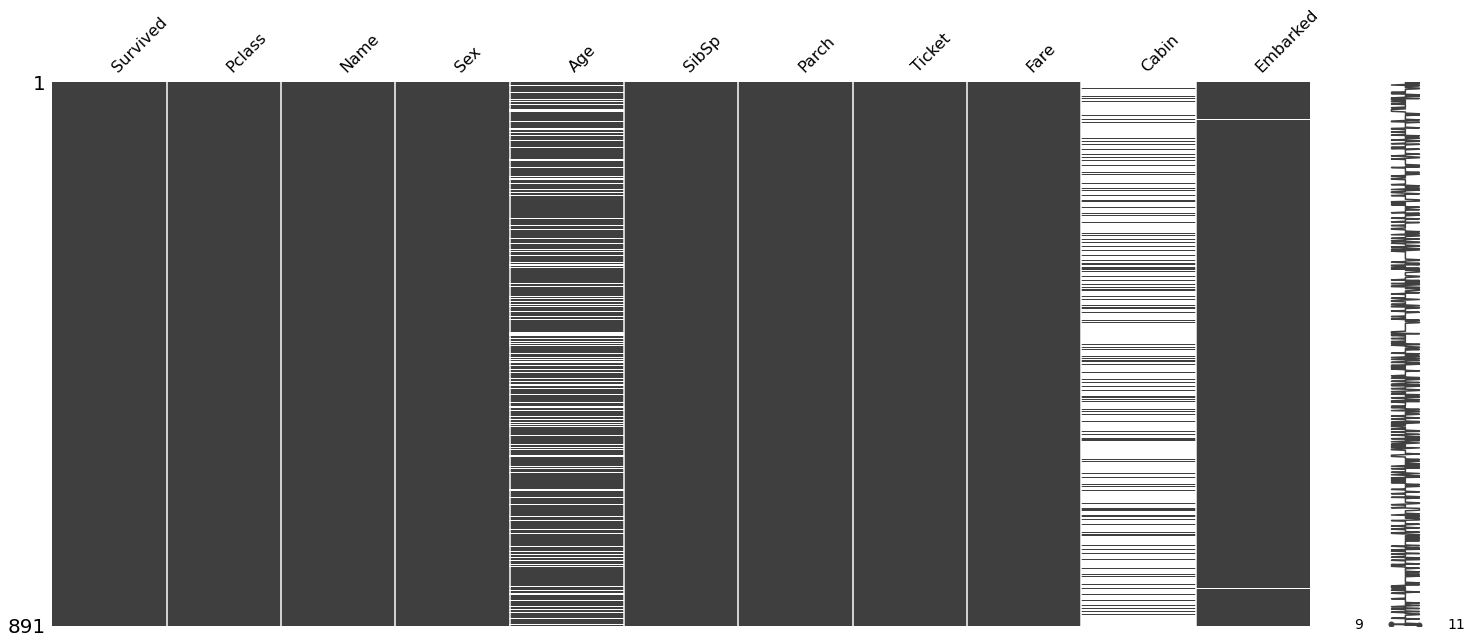

In [102]:
m.matrix(df)

In [ ]:
m.heatmap(df)

In [ ]:
m.bar(df_test)

In [103]:
get_title = (lambda x: x.split(",")[1].strip().split(".")[0].strip())
df["Title"] = df["Name"].map(get_title)
df_test["Title"] = df_test["Name"].map(get_title)

In [104]:
df["Title"]

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Title, Length: 891, dtype: object

In [105]:
title_dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [106]:
df["Title"] = df["Title"].map(title_dictionary)
df_test["Title"] = df_test["Title"].map(title_dictionary)

In [78]:
df_test["Title"].sample(n=15)

PassengerId
1032    Miss
1215      Mr
963       Mr
1142    Miss
912       Mr
1169      Mr
1277    Miss
1017    Miss
945     Miss
1272      Mr
928     Miss
1122      Mr
1068    Miss
931       Mr
1007      Mr
Name: Title, dtype: object

In [ ]:
df_test['Ticket']#worthless dont waste yoru time

In [ ]:
df_test["Cabin"].sample(n=20) #most of them are missing

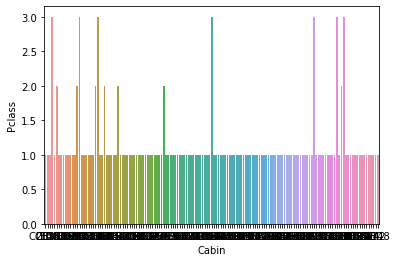

In [87]:
import seaborn as sns
sns.barplot(x='Cabin', y='Pclass', data=df)#it is obvious that Pclass 1 has most of cabins

In [107]:
df["Cabin"] = df["Cabin"].apply(lambda x: 1 if x is True else 0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,Officer
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S,Miss


In [108]:
df["AloneOrNot"] = (df["SibSp"] + df["Parch"]).apply(lambda x: 1 if x>0 else 0)
df["AloneOrNot"].unique()

array([1, 0])

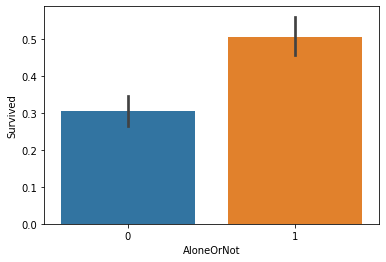

In [109]:
sns.barplot(x='AloneOrNot', y='Survived', data=df)#it can be clearly seen that if u came Titanic Alone u will Die Alone

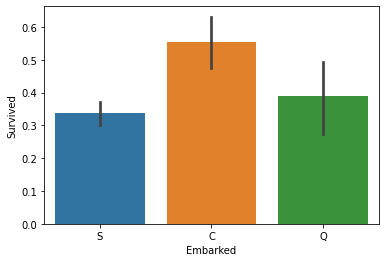

In [26]:
sns.barplot(x='Embarked', y='Survived', data=df) # it is hard to interfere atm maybe should consider with combination of class fare or age

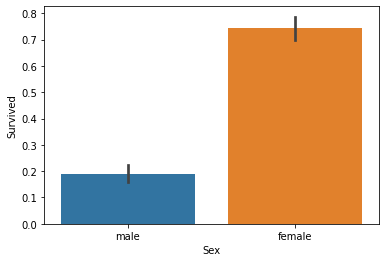

In [28]:

sns.barplot(x='Sex', y='Survived', data=df)#looks like a benevolent sexism

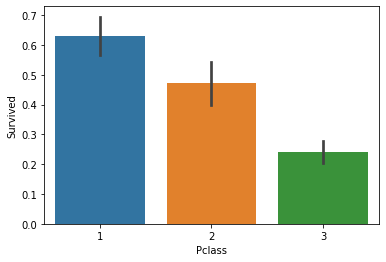

In [20]:
sns.barplot(x='Pclass', y='Survived', data=df)#money talks

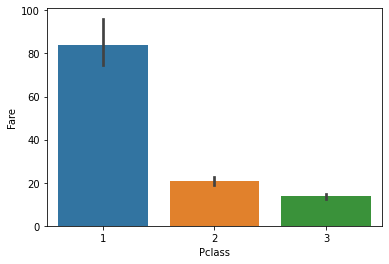

In [30]:
sns.barplot(x='Pclass', y='Fare', data=df)#money talks here

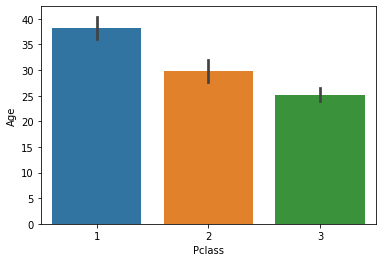

In [19]:
sns.barplot(x='Pclass', y='Age', data=df)

For X data, notice that...

We drop Survived because is the target variable 

We drop Name because we have extracted the Title: Mr, Mrs, ...

We drop Ticket because it has no information -> see df.Ticket.nunique()

We drop Cabin because it has a lot of missings (77% are missings)

Then, we identify numerical variables and categorical variables,


In [110]:
#Preprocessing (drop unnecessary parts)
x = df.drop(["Name","Ticket","Survived","SibSp","Parch"], 1)
y = df["Survived"]
x_test = df_test.drop(["Name", "Ticket","SibSp","Parch"],1)

In [116]:
x.isnull().sum()

Pclass          0
Sex             0
Age           177
Fare            0
Cabin           0
Embarked        2
Title           0
AloneOrNot      0
dtype: int64

In [112]:
cat_vars  = ['Sex', 'Embarked', 'Title']         # x.select_dtypes(include=[object]).columns.values.tolist()
num_vars  = ['Pclass', 'AloneOrNot', 'Cabin', 'Fare', 'Age'] # x.select_dtypes(exclude=[object]).columns.values.tolist()#Pclass needs to be treated as ordinal
# for fare it is needed to scale #for age im not sure frm bar plot we can understand there is some relationship btween age  however im not sure that i know the convenient approach
print("\nNumerical features:\n", num_vars)
print("\nCategorical features:\n", cat_vars)


Numerical features:
 ['Pclass', 'AloneOrNot', 'Cabin', 'Fare', 'Age']

Categorical features:
 ['Sex', 'Embarked', 'Title']


In [ ]:
x_test

In [34]:
#use label encoder or ordinal encoder for cabin which will goes like A-T(descending order) and nan values will take lets say -1 (couldnt make it happen atm)
#use KNNimputer for the Age and groupby lets say Pclass and sex then give the age make these two steps for one pipeline
#sibsb and parch should be merged and considers as a one column which will provide info is passenger alone or not
#Dont run this cell before make it above comments happen
oneh_preporcessin = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy="constant", fill_value='missing')),
    ('oh_enc', preprocessing.OneHotEncoder())
])
num_preprocessing = pipeline.Pipeline(steps=[
  ("imputer" impute.IterativeImputer(max_iter=50, random_state=0)),
  ()

])
cat_preporcessing = pipeline.Pipeline(steps=[
  CategoricalImputer(variables=['grade'], imputation_method='frequent')
  # Some Encoder here. Remember to handle_unknown
])


In [46]:
#pipe = make_pipeline(step1,step2,step3....)

In [118]:

cat_4_multModels = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
    ('one hot', preprocessing.OneHotEncoder(
))
])


num_4_multmodels=pipeline.Pipeline(steps=[
    ("imputer",impute.KNNImputer(n_neighbors=5)),
    ("quantile transformer",preprocessing.QuantileTransformer(n_quantiles=100, random_state=0))
    ])

tree_prepro = compose.ColumnTransformer(transformers=[
    ("cat mult",cat_4_multModels,cat_vars),
    ("num mult",num_4_multmodels,num_vars)
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

tree_prepro

ColumnTransformer(transformers=[('cat mult',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('one hot', OneHotEncoder())]),
                                 ['Sex', 'Embarked', 'Title']),
                                ('num mult',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('quantile transformer',
                                                  QuantileTransformer(n_quantiles=100,
                                                                      random_state=0))]),
                                 ['Pclass', 'AloneOrNot', 'Cabin', 'Fare',
                                  'Age'])])

In [121]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import e nable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

In [122]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [135]:
mult_classifiers={
    "SVM": svm.SVC(),
    "Logistic": LogisticRegression(),
    "KNN":KNeighborsClassifier(n_neighbors=3),
    "MLP":MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
    "RDF":RandomForestClassifier(random_state=42),
    "CLF": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    "LGBM":LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100)
    "CatBoost":CatBoostClassifier()
    }

mult_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in mult_classifiers.items()}

mult_classifiers["SVM"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat mult',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('one hot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Embarked', 'Title']),
                                                 ('num mult',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=100,
                                                                                       random_state=0))]),
                                                  ['Pclass', 'AloneOrNot',
                                                   'Cabin', 'Fare', 'Age'])])),
                ('svc', SVC())])

In [136]:

x_train, x_val, y_train, y_val = model_selection.train_test_split(x,y, test_size=0.2,stratify = y, random_state=4)



results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in mult_classifiers.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    model.fit(x_train,y_train)
    # GET PREDICTIONS USING x_val
    pred = model.predict(x_val)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              





results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,Model,Accuracy,Bal Acc.,Time
1,CLF,86.033520,85.665349,0.127196
2,RDF,84.916201,82.865613,0.281428
3,MLP,83.798883,80.606061,0.222923
4,SVM,83.240223,80.151515,0.077860
5,LGBM,83.240223,82.312253,0.141483
6,Logistic,82.681564,81.317523,0.065092
7,KNN,79.888268,78.234519,0.059244


In [ ]:
svc=SVC(random_state=42)
rdf=RandomForestClassifier(random_state=42)
ada=AdaBoostClassifier(random_state=42)
log=LogisticRegression(random_state=42)
grb=GradientBoostingClassifier(random_state=42)
dct=DecisionTreeClassifier(random_state=42)
ext=ExtraTreesClassifier(random_state=42)
xgb=XGBRFClassifier(random_state=42)
xgbc=XGBClassifier(random_state=42)

models=[svc,rdf,ada,log,grb,dct,ext,xgb,xgbc]

for model in models:
    scores.append(cross_val_score(model,train,target,cv=kfolds,n_jobs=-1))
    scores_mean=np.mean(scores,axis=1)